## Make SHAP plots

In [ ]:
import os 
import pathlib
import pickle as pkl
import cloudpickle 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from bill_classification import *
import shap
    #shap.plots.scatter(shap_values[:, "bin__position_yes",1])

In [4]:
shap.initjs()

In [3]:
#LOAD SHAP VALUES (CALCULATED IN SHAP_PLOTS.PY)
SHAP_path = '../out/models/shap_vals.pkl'
with open(SHAP_path, 'rb') as file:
    shap_values, X_test_tr, y_test_sub, y_pred_sub = pkl.load(file)

In [5]:
#GET INDICES OF FEATURES WITH OPPOSE COUNTS AND SUPPORT COUNTS 
feature_names = shap_values.feature_names
#get opposing features
pos_o = '_o' # Substring 
ind_op = [idx for idx, val in enumerate(feature_names) if pos_o in val]
ind_op = list(filter(lambda x: x > 16, ind_op))
#get supporting features
pos_s = '_s' # Substring
ind_su = [idx for idx, val in enumerate(feature_names) if pos_s in val]
ind_su = list(filter(lambda x: x > 16, ind_su))

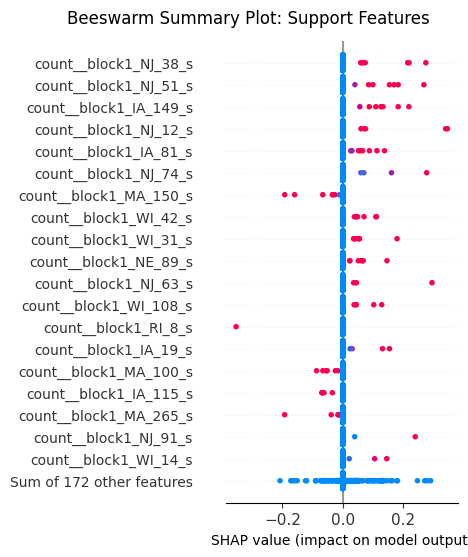

In [8]:
#PLOT SUPPORT FEATURES
fig, ax = plt.subplots(figsize=(3, 6))
ax=shap.plots.beeswarm(shap_values[:,ind_su,1], max_display=20, show=False, color_bar=False,
                       plot_size=(3,6))
plt.yticks(fontsize=10)
ax.set_xlabel("SHAP value (impact on model output)", fontsize=10)
plt.title("Beeswarm Summary Plot: Support Features",y=1.02, x=0.1)
plt.savefig("../out/MLP_eval/beeswarm_sup.png", bbox_inches='tight', dpi = 1000)

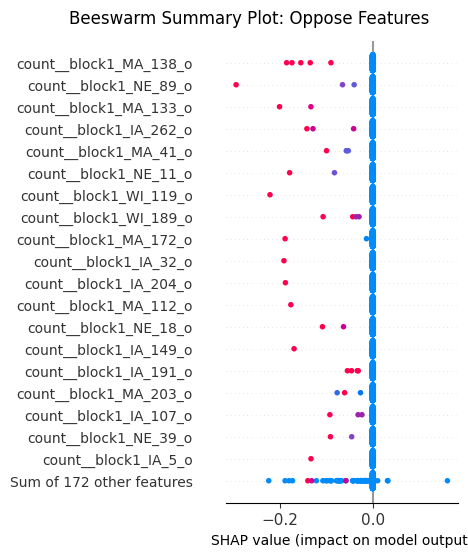

In [7]:
#PLOT OPPOSE FEATURES
fig, ax = plt.subplots(figsize=(3, 6))
ax=shap.plots.beeswarm(shap_values[:,ind_op,1], max_display=20, show=False,
                       plot_size=(3,6), color_bar=False)
plt.yticks(fontsize=10)
ax.set_xlabel("SHAP value (impact on model output)", fontsize=10)
plt.title("Beeswarm Summary Plot: Oppose Features",y=1.02, x=0.1)
plt.savefig("../out/MLP_eval/beeswarm_opp.png", bbox_inches='tight', dpi = 1000)

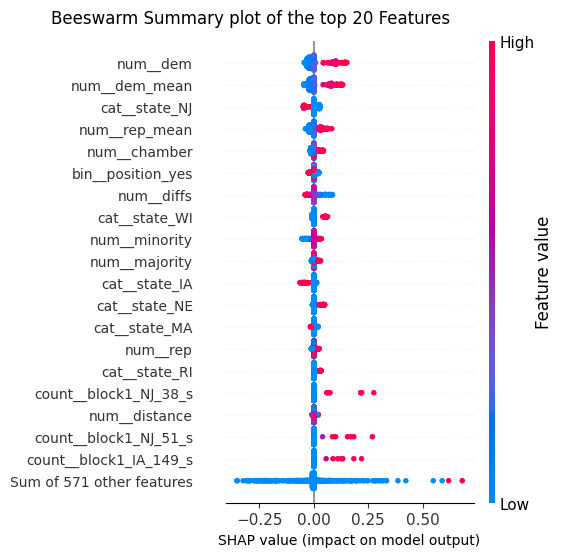

In [6]:
#PLOT TOP 20 FEATURES
fig, ax = plt.subplots(figsize=(4, 6))
ax = shap.plots.beeswarm(shap_values[:,:,1], max_display=20, show=False, plot_size=(4,6))
plt.yticks(fontsize=10)
ax.set_xlabel("SHAP value (impact on model output)", fontsize=10)
plt.title("Beeswarm Summary plot of the top 20 Features",y=1.02, x=0.1)
plt.savefig("../out/MLP_eval/beeswarm.png", bbox_inches='tight', dpi = 1000)

In [151]:
#return: ind: 12,
ind = 200 #index of target
print(f"true value: {y_test_sub[ind][0]} predicted value: {y_pred_sub[ind]}")

shap.force_plot(shap_values[ind,:,1])

#positions taken is pushing it 

true value: 1 predicted value: [0.50157572 0.49842428]
